# Task 2

Perform hyper-parameter tuning on the DecisionTree algorithm in order to predict the target column "packed_cell_volume" for the status of each horse in the dataset. Use 5-fold cross-validation for the hyper-parameter tuning, tune the parameters "criterion", "max_depth", and "min_samples_split". Provide at least 3 values for each parameter.

## Dataset description

### Features

* id - horse identifier
* surgery - was the horse in surgery (0 - no, 1 - yes)
* age - if the horse is young or old (0 - old, 1 - young)
* hospital_number - the identifier of the hospital the horse was treated in
* rectal_temp - the horse's rectal temperature
* pulse - the horse's pulse
* respiratory_rate - the horse's respiratory rate
* temp_of_extremities - the horse's temperature of the extremities (represented as categories ordered by intensity)
* nasogastric_reflux_ph - ph value of the horse's nasogastric reflux
* total_protein - horse's total protein value
* abdomo_protein - horse's abdominal protein value
* surgical_lesion - whether the horse has a surgical lesion or not
* lesion_1 - size of the lesion (0 if the horse doesn't have one)
* cp_data - binary variable

### Target variable
* packed_cell_volume - volume of horse's packed cells

### Download the dataset

In [ ]:
! gdown 1-6y_xGi204yBOq8q_4-i1J-afXxVBHKB

Downloading...
From: https://drive.google.com/uc?id=1-6y_xGi204yBOq8q_4-i1J-afXxVBHKB
To: /content/data_g2.csv
100% 72.4k/72.4k [00:00<00:00, 4.35MB/s]


### Read the dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data = pd.read_csv('/content/data_g2.csv')

In [ ]:
data.head(3)

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,surgical_lesion,lesion_1,cp_data
0,0,1,0,530001,38.1,132.0,24.0,2,6.5,57.0,8.5,3.4,1,2209,0
1,1,1,0,533836,37.5,88.0,12.0,2,2.0,33.0,64.0,2.0,1,2208,0
2,2,1,0,529812,38.3,120.0,28.0,2,3.5,37.0,6.4,3.4,1,5124,0


In [ ]:
data.drop(columns=['id'], inplace=True)

### Check if dataset is balanced, or if not applicable give your reasons why



<Axes: ylabel='Frequency'>

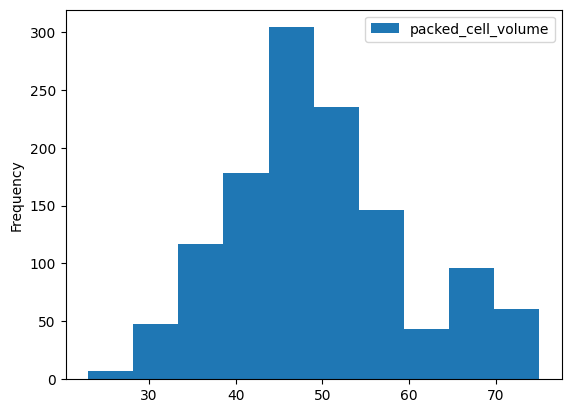

In [ ]:
data[['packed_cell_volume']].plot.hist()  # data is numerical, not applicable to classify data in different categories, hence we can't talk about the balance of dataset

### Perform all necessary transformations of the data

In [ ]:
msno.matrix(data)

In [ ]:
X, Y = data.drop(columns=['packed_cell_volume']), data['packed_cell_volume']

### Hyper-parameter tuning and cross-validation

Choose a metric to optimize, choose hyper parameter values to experiment with, perform 5-fold cross-validation.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler


In [ ]:
DecisionTreeRegressor()
scaler = StandardScaler()
scores = []
for max_depth in [5, 10, 15, 20]:
  for criterion in ["squared_error", "friedman_mse", "absolute_error"]:
    for min_samples_split in [2, 5, 10, 20]:
      kfold = KFold(n_splits=6)
      for train_index, test_index in kfold.split(X):
        X_train, Y_train = X.values[train_index], Y.values[train_index]
        X_test, Y_test = X.values[test_index], Y.values[test_index]
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
        Y_train = scaler.fit_transform(Y_train.reshape(-1, 1))
        model = DecisionTreeRegressor(criterion=criterion, max_depth=max_depth, min_samples_split=min_samples_split)
        model.fit(X_train, Y_train)
        preds = model.predict(X_test)
        preds = scaler.inverse_transform(preds.reshape(-1, 1))
        scores.append((max_depth, criterion, min_samples_split, mean_squared_error(Y_test, preds)))

In [ ]:
min = float('+inf')
for score in scores:
  if score[3] < min:
    min = score[3]

In [ ]:
min  # best score for (5, 'absolute_error', 2, 74.5910931174089)

74.5910931174089

In [ ]:
scores

[(5, 'squared_error', 2, 90.33369229538242),
 (5, 'squared_error', 2, 77.80760334699073),
 (5, 'squared_error', 2, 80.69313941615896),
 (5, 'squared_error', 2, 79.51047612608085),
 (5, 'squared_error', 2, 84.0718654952445),
 (5, 'squared_error', 5, 87.68794330752816),
 (5, 'squared_error', 5, 77.82379767897456),
 (5, 'squared_error', 5, 80.60474535408069),
 (5, 'squared_error', 5, 79.51047612608085),
 (5, 'squared_error', 5, 84.5403765163871),
 (5, 'squared_error', 10, 87.25005644293077),
 (5, 'squared_error', 10, 77.82379767897456),
 (5, 'squared_error', 10, 76.74834001782341),
 (5, 'squared_error', 10, 79.091529838914),
 (5, 'squared_error', 10, 80.94088026545755),
 (5, 'squared_error', 20, 88.8526202463172),
 (5, 'squared_error', 20, 78.95009993989919),
 (5, 'squared_error', 20, 77.13377958932591),
 (5, 'squared_error', 20, 79.36729931959577),
 (5, 'squared_error', 20, 82.0272217287618),
 (5, 'friedman_mse', 2, 90.44078293865728),
 (5, 'friedman_mse', 2, 77.80760334699073),
 (5, 'fr

### Evaluate the performance of the best model using multiple metrics

Calculate metrics

Display a confusion matrix if applicable

In [ ]:
model = DecisionTreeRegressor(criterion='absolute_error', max_depth=5, min_samples_split=2)

In [ ]:
X, Y = data.drop(columns=['packed_cell_volume']), data['packed_cell_volume']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8)
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
model.fit(X_train, Y_train)
preds = model.predict(X_test)

In [ ]:
 mean_squared_error(Y_test, preds)

84.21406882591093